In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import pearsonr
import numpy as np
from scipy.stats import chi2
from numpy.linalg import inv


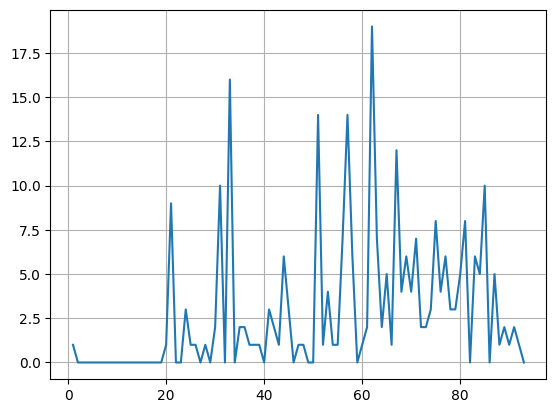

Pearson correlation: 0.337957732147185
Pearson correlation: 0.9683640032974627
                             OLS Regression Results                            
Dep. Variable:     Wystapienia_lacznie   R-squared:                       0.938
Model:                             OLS   Adj. R-squared:                  0.937
Method:                  Least Squares   F-statistic:                     1370.
Date:                 Sat, 21 Dec 2024   Prob (F-statistic):           1.19e-56
Time:                         14:24:25   Log-Likelihood:                -421.63
No. Observations:                   93   AIC:                             847.3
Df Residuals:                       91   BIC:                             852.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

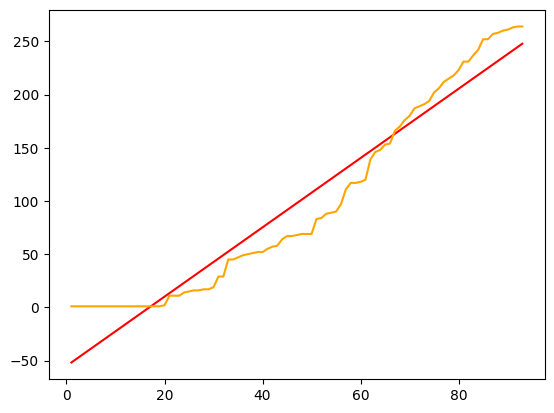

In [2]:
# Read the data from the CSV file
data = pd.read_csv('Dane_awarii.csv', sep=';', header=0)

# Plot the number of errors (`Liczba_bledow`) for each month (`Nr_miesiaca`)
plt.plot(data['Nr_miesiaca'], data['Liczba_bledow'])
plt.grid(True)
plt.show()

# Calculate the Pearson correlation coefficient between 'Liczba_bledow' and 'Nr_miesiaca'
corr, _ = pearsonr(data['Liczba_bledow'], data['Nr_miesiaca'])
print(f"Pearson correlation: {corr}")

# Add a new column 'Wystapienia_lacznie' to store the cumulative number of errors
data['Wystapienia_lacznie'] = 0

# Loop through all rows to calculate the cumulative sum of errors
for i in range(len(data)):
    # Cumulative sum of errors up to and including the current row
    data.loc[i, 'Wystapienia_lacznie'] = data['Liczba_bledow'][:i + 1].sum()


corr, _ = pearsonr(data['Wystapienia_lacznie'], data['Nr_miesiaca'])
print(f"Pearson correlation: {corr}")


X=sm.add_constant(data['Nr_miesiaca'])
y=data['Wystapienia_lacznie']
wynik= sm.OLS(y, X).fit()
print(wynik.summary())

# Plot the cumulative sum of errors for visualization
plt.plot(data['Nr_miesiaca'], wynik.predict(X), label='Regresja liniowa', color='red')
plt.plot(data['Nr_miesiaca'], data['Wystapienia_lacznie'], label='Skumulowane błędy', color='orange')
plt.show()
#regresja

#  wzor regresji
# sza

# napisz funcje logistyczna  metodą szacowania parametrow hottellinga


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.2687e+06                                    6.56e+05    
       1              2         3.8095e+05      8.88e+05       2.67e+01       5.97e+05    
       2              3         6.7243e+04      3.14e+05       9.76e+00       2.45e+05    
       3              4         2.4272e+04      4.30e+04       2.19e+01       1.25e+05    
       4              5         5.8051e+03      1.85e+04       4.83e+01       9.47e+04    
       5              6         2.1852e+03      3.62e+03       2.80e+01       4.91e+04    
       6              7         1.6835e+03      5.02e+02       1.19e+01       7.18e+03    
       7              8         1.6729e+03      1.06e+01       1.90e+00       5.99e+01    
       8              9         1.6729e+03      1.39e-02       1.77e-01       2.61e+01    
       9             10         1.6729e+03      4.32e-05       1.29e-02       1.75e-01    

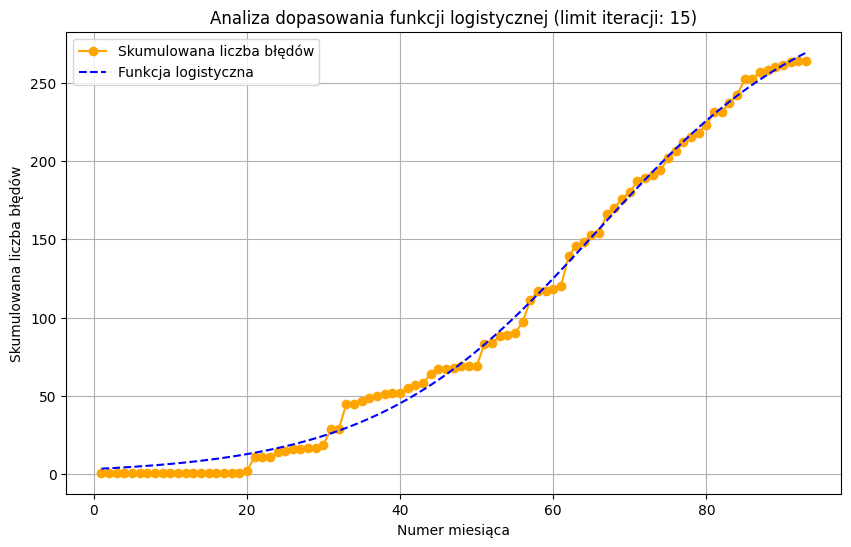

In [3]:
from scipy.optimize import least_squares
import numpy as np
import matplotlib.pyplot as plt


# Funkcja logistyczna
def logistic_function(t, alpha, beta, gamma):
    return alpha / (1 + beta * np.exp(-gamma * t))


# Funkcja błędu (różnica między danymi rzeczywistymi a modelowanymi)
def residuals(params, t, y):
    alpha, beta, gamma = params
    return y - logistic_function(t, alpha, beta, gamma)


# Dopasowanie funkcji logistycznej
x_data = data['Nr_miesiaca']
y_data = data['Wystapienia_lacznie']

# Początkowe wartości parametrów
initial_guess = [max(y_data), 1, 0.1]

# Ustawienie maksymalnej liczby iteracji
max_iterations = 15 # Tutaj ustawisz maksymalną liczbę iteracji

# Dopasowanie funkcji za pomocą least_squares z ograniczeniami
result = least_squares(
    residuals,  # Funkcja błędu
    initial_guess,  # Wartości początkowe
    args=(x_data, y_data),  # Argumenty przekazywane do funkcji błędu
    bounds=([max(y_data) * 0.8, 0, 0], [max(y_data) * 2.0, np.inf, 1.0]),  # Ograniczenia
    verbose=2,  # Włączenie szczegółów iteracji
    max_nfev=max_iterations  # Maksymalna liczba iteracji
)

# Wyciągnięcie dopasowanych parametrów
alpha, beta, gamma = result.x
print(f"Parametry funkcji logistycznej: alpha={alpha:.2f}, beta={beta:.2f}, gamma={gamma:.4f}")

# Przewidywanie wartości przy pomocy dopasowanej funkcji
data['Logistic_Prediction'] = logistic_function(x_data, alpha, beta, gamma)

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.plot(data['Nr_miesiaca'], data['Wystapienia_lacznie'], label='Skumulowana liczba błędów', color='orange',
         marker='o')
plt.plot(data['Nr_miesiaca'], data['Logistic_Prediction'], label='Funkcja logistyczna', color='blue', linestyle='--')
plt.xlabel('Numer miesiąca')
plt.ylabel('Skumulowana liczba błędów')
plt.title(f'Analiza dopasowania funkcji logistycznej (limit iteracji: {max_iterations})')
plt.legend()
plt.grid(True)
plt.show()
